# Sara Ferrari, Michael Vizelman, Rachel Ward - DAV 6150 - Project 2

## Introduction

In the first part of this project, we will be implementating clustering algorithms (hierarchical clustering and  K-means clustering) on a dataset consisting of data on more than 12,000 sessions of online-shoppers to create groupings of similar shoppers. We will then choose an appropriate number of groupings based on both algorithms and compare it to the appropriate number based on our domain knoledge regarding the dataset.     
In the second part of this project, we will apply labels to the data observations assigned to the groupings found by the clustering algorithms, and then, after completing the necessary EDA and data prep work, we will construct an SVM model, using features we determine appropriate, to predict the most likely categorization of any previously unseen data items. Such a model would be of interest to most online retailers, trying to predict whether or not a given site visitor will end up executing a purchase while engaged with the web site.

The dataset used for this project was sourced from the UCI Machine Learning Repository, and can be found [here]( https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#). The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. The dataset consists of 10 numerical attributes, that represent a variaty of metrics captured during user sessions on online retailers web pages, and 8 categorical attributes that represent meta data about the session.  

To accomplish the objectives of this project, we will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of our data.

Then, based on the results of our EDA, we will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by our domain knowledge and our EDA, and will be explained further in that section. 

After the data preparation, we will apply a hierarchical clustering algorithm to the data, and plot a Dendrogram to see how many clusters should be imposed on the data, based on what the Dendrogram shows. Additionally, we will implement a K-means clustering algorithm by using a range of values for K to create an elbow plot and a silhouette plot for the dataset and use the plots to select an appropriate value for K. 

Next, we will apply a K-means clustering algorithm to the dataset using a value of K=2, perform EDA on the resulting two groupings to see whether the groupings are noticeably different from one another, and add a new column to our dataset named "Revenue" to which we will insert the grouping assignments identified by our K-means clustering for each observation within the dataset. 

After creating our Revenue column, we will add another new column to our dataframe, called V_Revenue. This column contains the actual classification labels for our observations. We will compare the content of the V_Revenue column to the content of the Revenue column generated by our clustering algorithm, and calculate some basic comparative statistics between the two columns.

Next, we will apply feature selection and/or dimensionsality reduction techniques as appropriate to identify which explanatory variables we will include in our SVM models. Then, we will separate the dataframe into training and testing subsets and construct at least two different SVM models using different explanatory variables. After training our SVM models, we will select the best model and apply it to our testing subset, and assess how well it performs.

Finally, we will compare the predicted values for the Revenue attribute from the testing subset to the
corresponding values of the V_Revenue variable and evaluate our results.

## Data Profiling & Domain Knowledge Development

<ins> The 10 numerical attributes included in the dataset are: </ins>
- **Administrative**: The number of administrative pages visited during the session.
- **Informational**: The number of informational pages visited during the session.
- **ProductRelated**: The number of product related pages visited during the session.
- **Administrative_Duration**: The total time spent (in seconds) in all administrative pages visited during the session.  
- **Informational_Duration**: The total time spent (in seconds) in all informational pages visited during the session.  
- **ProductRelated_Duration**: The total time spent (in seconds) in all product related pages visited during the session. 
- **BounceRates**: The value of [bounce rate](https://support.google.com/analytics/answer/1009409?hl=en) for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. Therefore, the attribute BounceRates is the average bounce rate of the pages visited in the session. 
- **ExitRates**: The value of [exit rate](https://support.google.com/analytics/answer/2525491?hl=en) for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. Therefore, the attribute ExitRates is the average exit rate of the pages visited in the session. 
- **PageValues**: The value of [page value](https://support.google.com/analytics/answer/2695658?hl=en) represents the average value for a web page that a user visited before completing an e-commerce transaction. Therefore, the attribute PageValues is the average page value of the pages visited in the session. If the page wasn't involved in an ecommerce transaction on the website in any way, then the page value for that page will be $0 since the page was never visited in a session where a transaction occurred. However, you can only see a true value for the page value if enhanced eCommerce tracking was implemented and/or if a goal value was assigned to the page.
- **Special Day**: Indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

<ins> The 7 categorical attributes included in the dataset are: </ins>
- **Operating system**: An operating system (OS) is system software that manages computer hardware, software resources, and provides common services for computer programs (i.e. Windows, Android, iOS, macOS, etc.). In the dataset the values are coded as numbers from 1 to 8 representing differnt operating systems. We do not have a data dictionary for the code values. 
- **Browser**: A web browser is a software application for accessing information on the World Wide Web (i.e. Chrome, Safari, Firefox, etc.). In the datset the values are coded as numbers from 1 to 13 representing differnt browsers.
- **Region**: Geographical Data values. In the datset the values are coded as numbers from 1 to 9 representing differnt geographical regions. We do not have a data dictionary for the code values. 
- **Traffic type**: The origin of referral to the web page which started the session. Possible sources include: a search engine, a referring site, direct - user directly typed the URL into a browser, and others. In the dataset the values are coded as numbers from 1 to 20 representing differnt traffic types. We do not have a data dictionary for the code values.
- **Visitor type**: The type of visitor during the session. The possible types are returning visitor, or new visitor. 
- **Weekend**: Boolean value (True/False) indicating whether the session was on the weekend.
- **Month**: The month of the year during which the session took place.

The categorical variable **Revenue** will be used as the target class label in the second part of this project, indicating  whether or not a site visitor ends up executing a purchase while engaged with the web site.

## Exploratory Data Analysis

First we will read the data into python using pandas read csv function. Then we will look for missing and/or invalid data values and perform an exploratory data analysis on our dataset to determine what data need to be prepared for a future machine learning model. 

In [1]:
#import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the file
Project2_data_file = 'https://raw.githubusercontent.com/vizelman/DAV-6150/master/Project2_Data.csv'
sessions = pd.read_csv(Project2_data_file)

#check results
sessions.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [2]:
#check the dataset for null values
sessions.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

There are no missing data values in any of our attributes.

In [3]:
#check data types
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Most of the attributes are of the types we would expect. Each of the duration attributes are floating point numbers, while the page count attributes are integers. The categorical atributes are boolean, strings or integers. We will now look more closely at the categorical variables to ensure that only the values we are expecting are present. 

In [4]:
#look at the VisitorType column to make sure we only have New_Visitor and Returning_Visitor as expected
sessions['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

We were only expecting values of "Returning_Visitor" and "New_Visitor". Based on domain knowledge we don't believe the value "Other" is valid. Therfore, we will now drop the rows containig that value. 

In [5]:
#drop the rows with value of "Other" because these are invalid; store indexes so we can remove the same rows in our test data
indexname1 = sessions[sessions['VisitorType'] == 'Other'].index
sessions.drop(indexname1,inplace=True)

#reset the indices
sessions.reset_index(drop=True,inplace=True)

In [6]:
#check the values of the Weekend column to make sure we have only True or False values
sessions['Weekend'].value_counts()

False    9384
True     2861
Name: Weekend, dtype: int64

In [7]:
#check Month column to see if there are any invalid months present
sessions['Month'].value_counts()

May     3364
Nov     2976
Mar     1907
Dec     1665
Oct      549
Sep      448
Aug      433
Jul      432
June     287
Feb      184
Name: Month, dtype: int64

We noticed that the values of the Weekend column are in boolean string form, so we will need to convert those to binary integers later on. 
Lastly, while there were no invalid months present, we note that there are no observations in neither January nor April.

Next we will look at the statistics of our numerical variables and integer based categorical variables.

In [8]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
sessions.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,2.321029,80.944413,0.505839,34.630576,31.865169,1199.080153,0.022078,0.042932,5.803858,0.061854,2.098326,2.311719,3.121437,4.002858
std,3.326056,176.579347,1.272970,141.137281,44.548083,1916.732843,0.048201,0.048378,18.075511,0.199540,0.825893,1.574388,2.375767,3.898928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.250000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.583333,0.003175,0.025137,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.600000,0.000000,0.000000,38.000000,1472.000000,0.016923,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


We note that our sample size is over 12,000 which is sufficiently large to build SVM models.

We see from the table above that the range of values in most of the variables is as expected.
For the ProductRelated_Duration, we believe there may be outliers present, since the max is over 63,000 seconds which would amount to around 17 hours. Based on our domain knowledge, it seems likely that an individual simply left their browser open to this page for quite some time, without being engaged. 

Based on our domain knowledge, we believe that viewing any page for over an hour (or 3600 seconds) is likely invalid. We will now create a new dataframe with a calculated column for the average amount of time spent per product related page and see how many observations have values of over 3600 seconds in this new column. Then we will determine if we need to remove any further data.

In [9]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#create new dataframe
sessions_longtime_per_page = sessions[['ProductRelated_Duration','ProductRelated']]

#create new column for average amount of time spent per product page visited
sessions_longtime_per_page['avg_productpage_time'] = sessions_longtime_per_page['ProductRelated_Duration']/sessions_longtime_per_page['ProductRelated']

#see how many observations have an average time of over an hour which we believe would be invalid
possible_invalid = sessions_longtime_per_page[(sessions_longtime_per_page['avg_productpage_time'] > 3600)]

#check results
print(possible_invalid.shape)
possible_invalid

(0, 3)


,ProductRelated_Duration,ProductRelated,avg_productpage_time


We see from above that although there are some very high values in the ProductRelated_Duration column, these values correspond to a very large number of product related pages viewed. Therefore, we do not believe these observaions are invalid and we will not be removing them from our dataset.

Next, we will look at the distributions of each of our variables. We will split this portion into numerical data for which we will plot histograms, and categorical data for which we will plot bar plots.

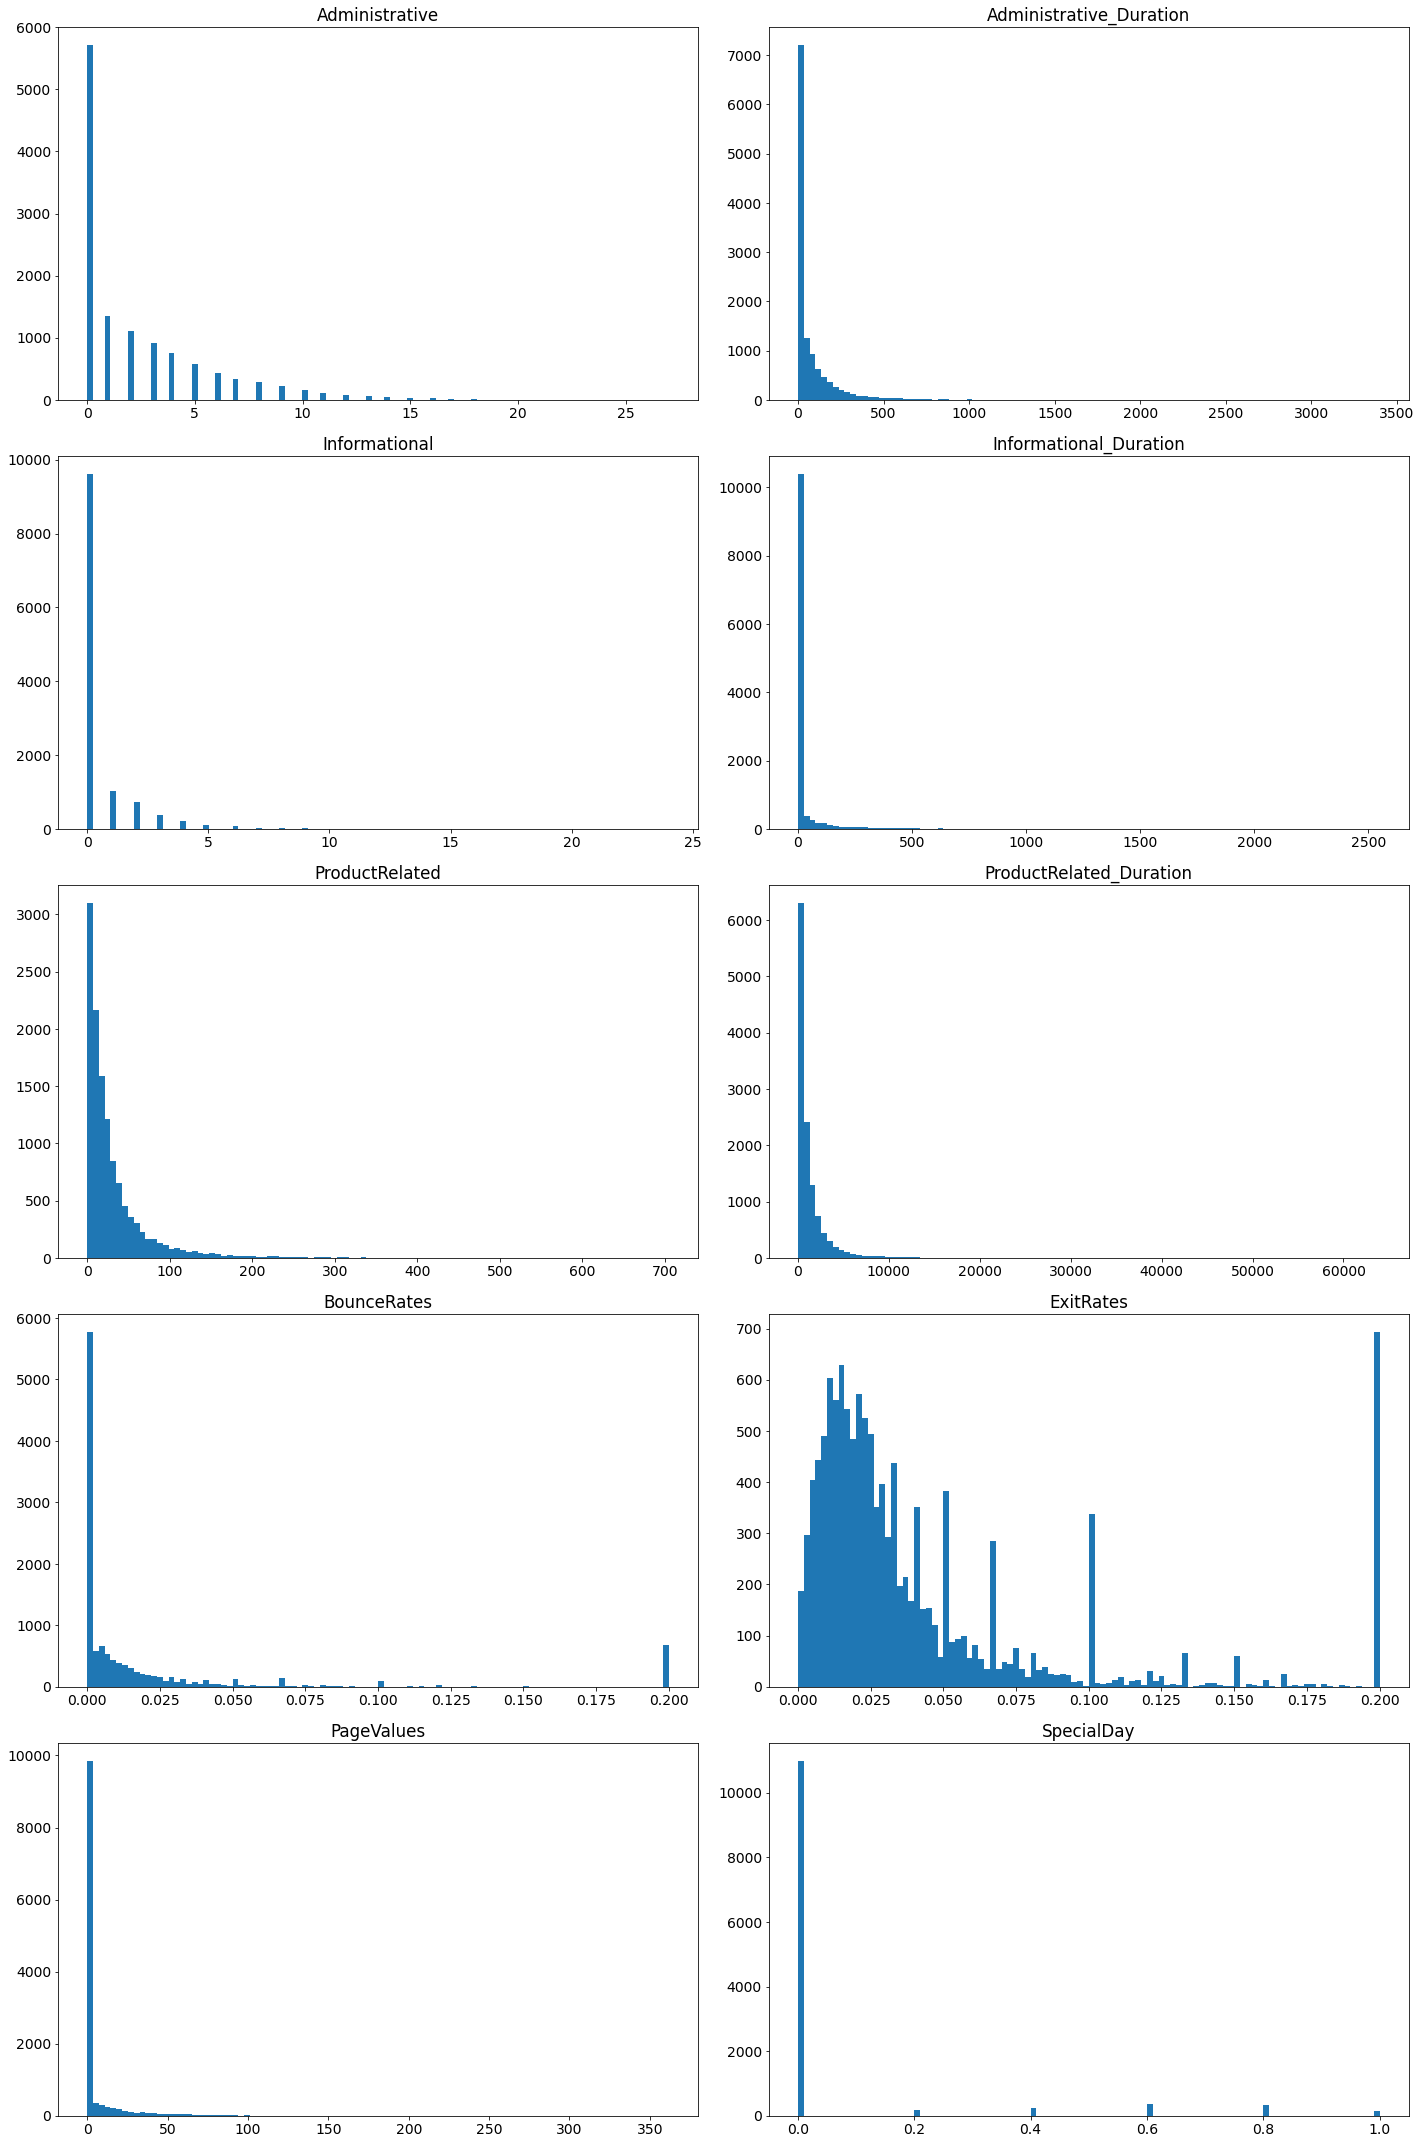

In [10]:
#create a smaller dataframe consisting of the numerical attributes
sessions_num = sessions[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

#plot a histogram for each of our numerical attributes

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
for k in sessions_num : #for each numerical column 
    plt.subplot(5,2,j) 
    plt.hist(sessions_num[k],bins=100)
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

We see from the above that the amounts of Administrative and Informational pages visited have similar ranges, while the amount of ProductRelated pages visited has a much larger range. The same is true for the respective durations of these three variables describing the duration of time spent on these types of pages.

The metrics BounceRates and ExitRates have a similar range of 0 to 0.2. 

Almost 10,000 of the observations have a PageValues value of 0. Since we do not know if tracking was implemented on the web pages included in the session this value is not reliable.

Over 10,000 of the observations have a SpecialDay value of 0 meaning they did not occur in proximity to a  "SpecialDay" (for example, Valentine's Day, Mother's Day, Christmas, etc.).

Also of note, all of the above variables are right skewed, and have a mode of 0. 

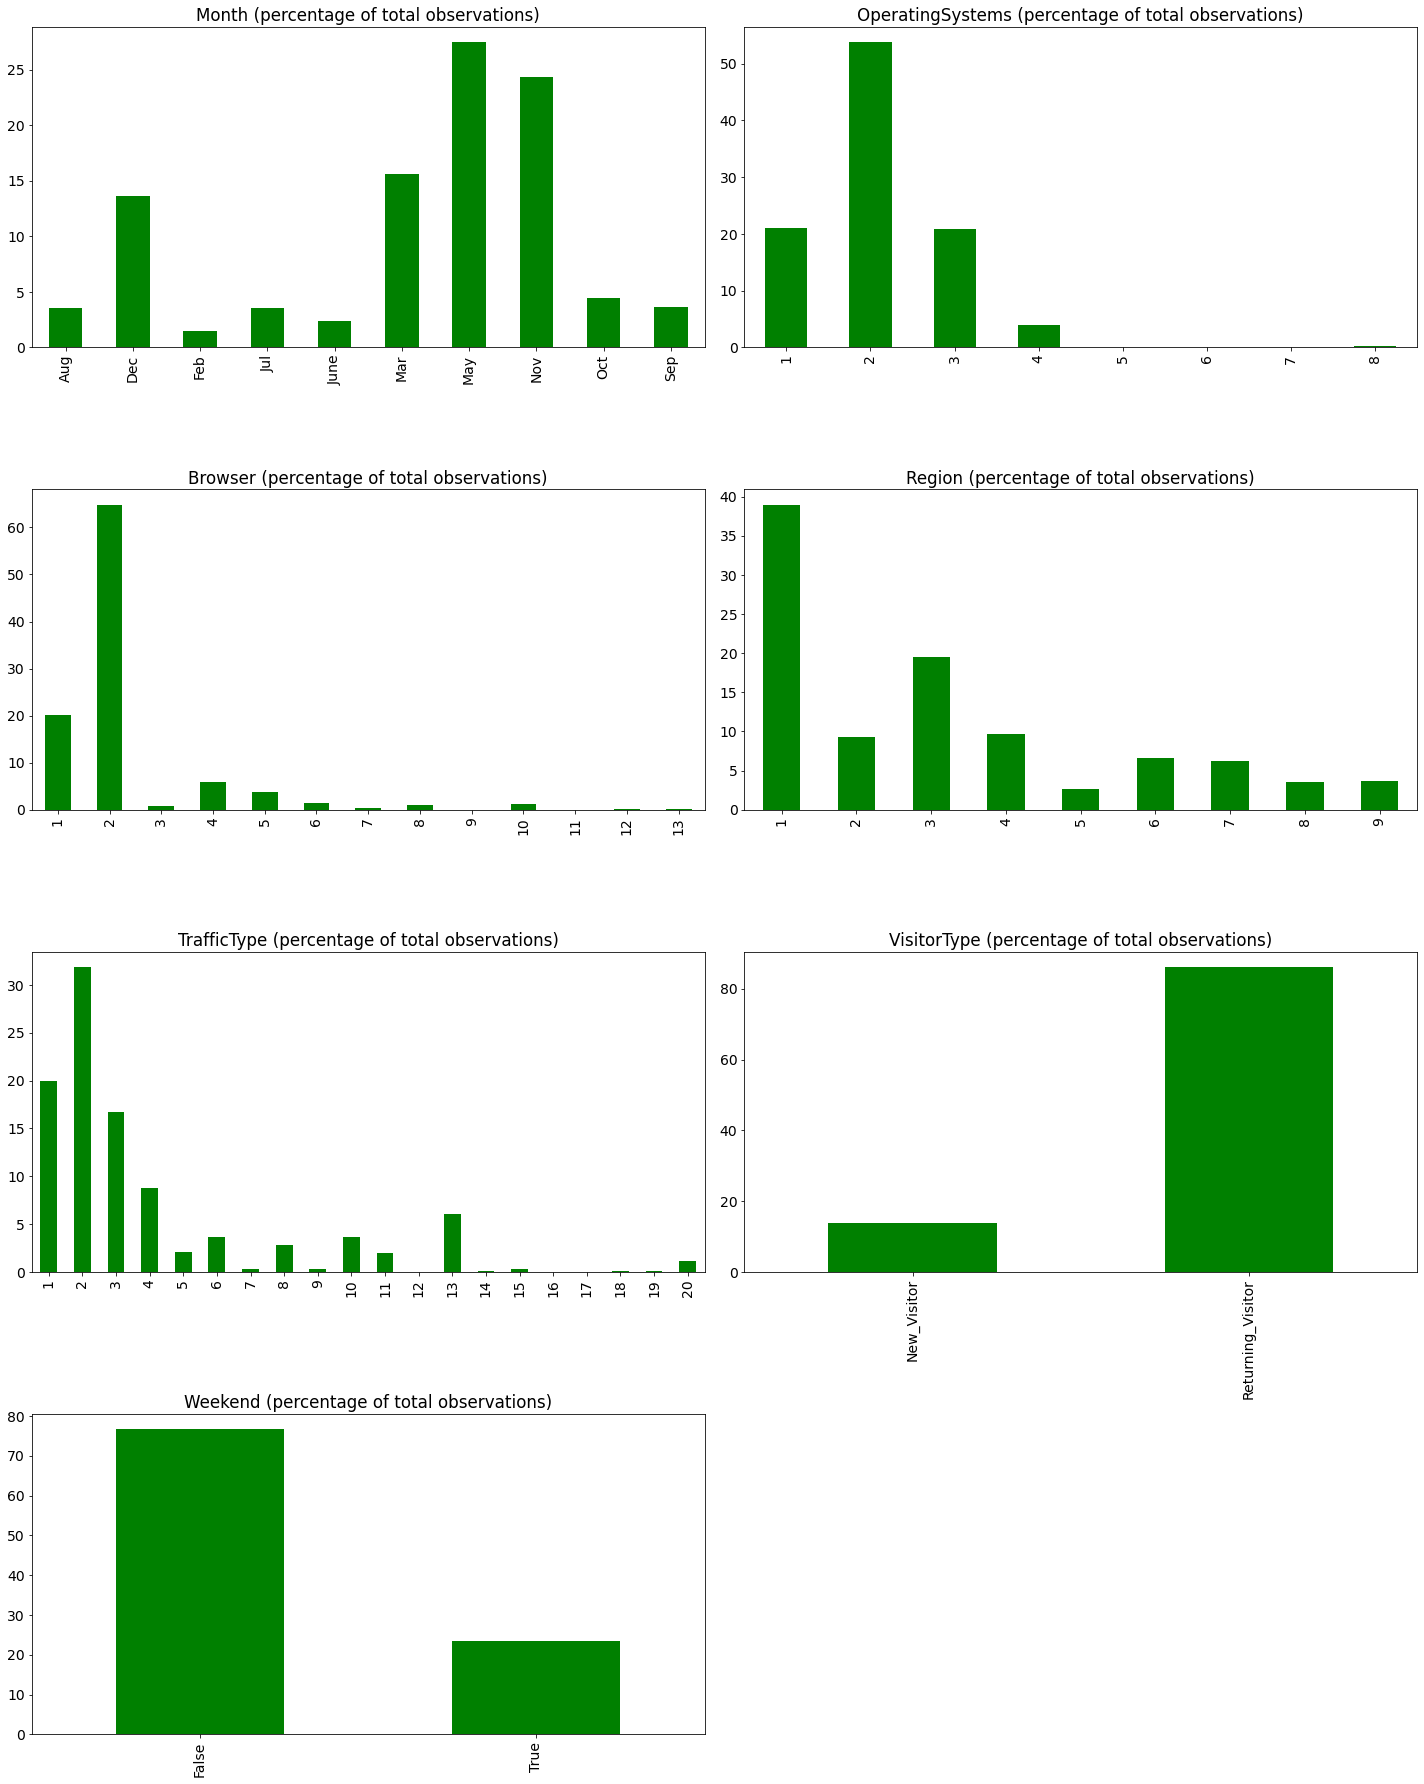

In [11]:
#create a smaller data frame consisting of our categorical attributes
sessions_cat = sessions[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]

#plot a bar chart for each of our categorical attributes as % of total 

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,25)}) 

#use an index to identify the spot of the subplot
j=1

for k in sessions_cat :   #for each categorical column 
    plt.subplot(4,2,j) 
    ((sessions_cat[k].value_counts()/len(sessions_cat[k]))*100).sort_index().plot(kind='bar', color='green');
    plt.title('%s (percentage of total observations)' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

Unsurprisingly, we see that more than 80% of VisitorType is Returning_Visitors. Based on our domain knowledge, this makes sense as individuals tend to frequent the same websites to make their purchases (i.e. Amazon, Target, etc.). 

Similarly, we are not surprised to see that over 70% of the Weekend variable is "False." This makes sense as most individuals spend their weekends on their hobbies including shopping in stores, rather than shopping online.

The most common OperatingSystem value was 2, the most common Browser variable is 2, and the most common TrafficType is also 2. The most common Month present is May, and the most common Region present is region 1. 

Next we will look at boxplots of our numerical variables to check for outliers.

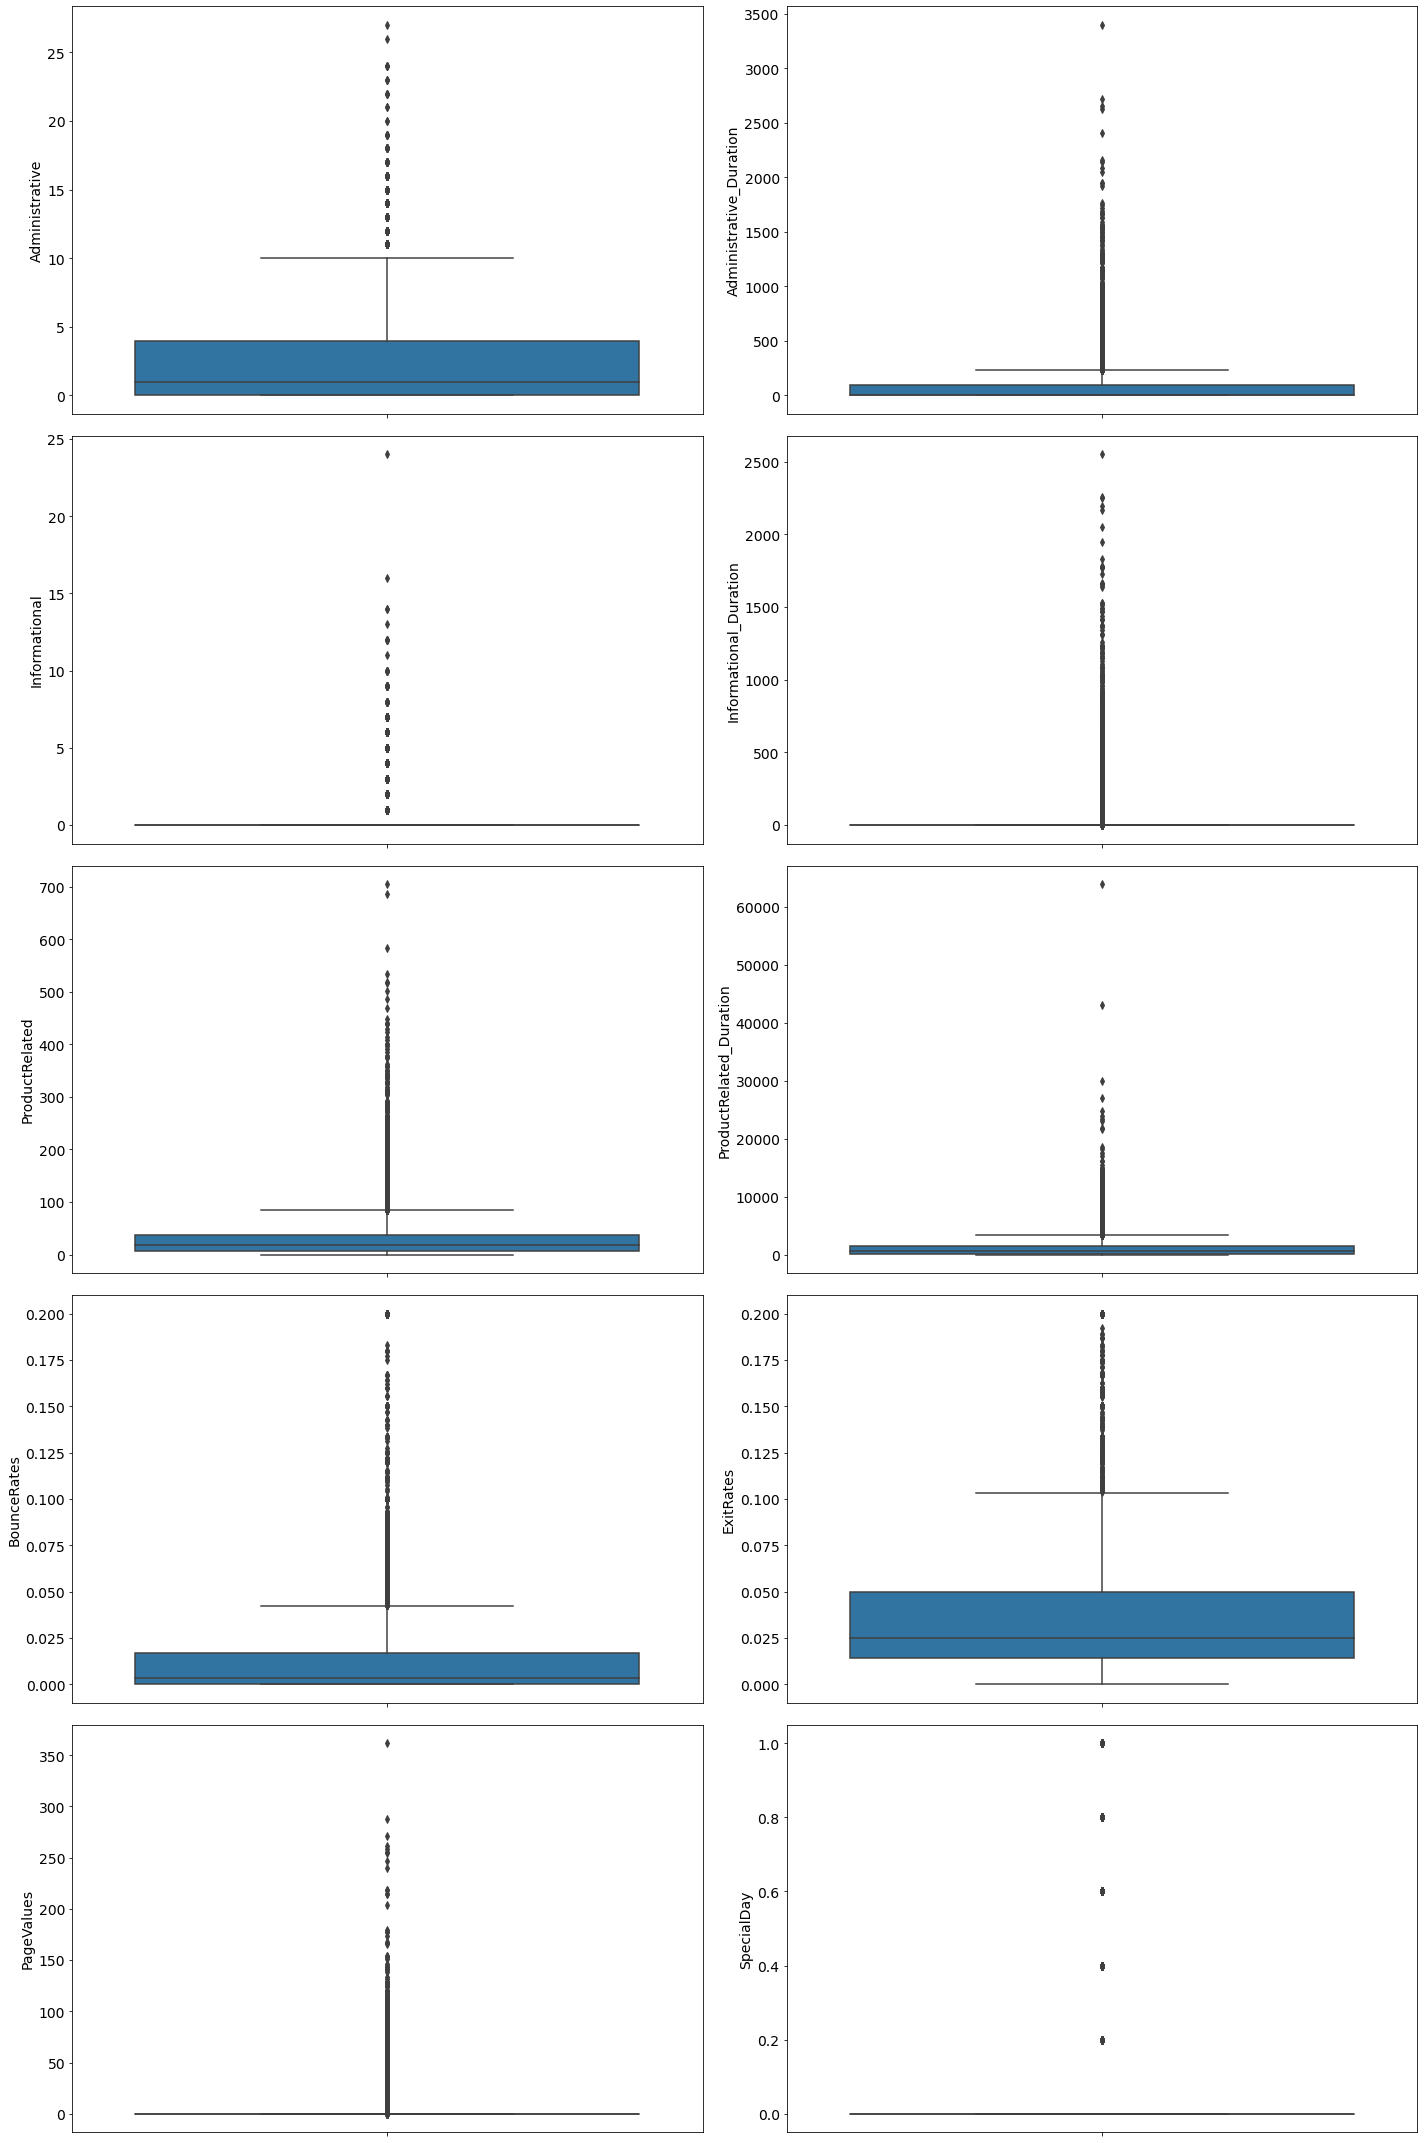

In [12]:
#plot boxplots of the distribution of each numerical variable

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#use an index to identify the spot of the subplot
j=1
for k in sessions_num.columns.to_list():   #for each numerical variable 
    plt.subplot(5,2,j) 
    sns.boxplot(data=sessions_num, y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

In [13]:
#count number of outliers per column
columns = sessions_num.columns.tolist()
new_df = sessions_num.copy()  #create a copy of our data frame
print('Current Shape of dataset:',sessions_num.shape)  #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in columns:
    IQ3 = new_df[k].quantile(0.75)
    IQ1 = new_df[k].quantile(0.25)
    IQR = (IQ3-IQ1)*1.5
    print('Number of outliers for variable "%s" is:' %k, new_df.shape[0]-new_df[((new_df[k]>=(IQ1-IQR)) & (new_df[k]<=(IQ3+IQR)))].shape[0])

Current Shape of dataset: (12245, 10)
Number of outliers for variable "Administrative" is: 403
Number of outliers for variable "Administrative_Duration" is: 1163
Number of outliers for variable "Informational" is: 2624
Number of outliers for variable "Informational_Duration" is: 2399
Number of outliers for variable "ProductRelated" is: 986
Number of outliers for variable "ProductRelated_Duration" is: 950
Number of outliers for variable "BounceRates" is: 1527
Number of outliers for variable "ExitRates" is: 1083
Number of outliers for variable "PageValues" is: 2714
Number of outliers for variable "SpecialDay" is: 1251


After seeing how many outliers are present, we realized that removing the outliers would be removing roughly a quarter (or more) of our original dataset which we do not feel is appropriate. Therefore we will not remove any outliers.

Next we will prepare our data and perform any transformations necessary.

## Data Preparation & Transformation 

Next, we will convert our boolean Weekend variable to 0's and 1's, convert our string variable VisitorType to 0's and 1's, and convert the Month variable to the integer representation of the months.

We will then combine sparse classes in the categorical variables that contian any. 

We will also convert the categorical variables that are type integer from above, into strings so that we can create dummy variables.

In [14]:
#create new df
sessions_new = sessions.copy()

#convert the boolean variable Weekend to 
sessions_new['Weekend'] = sessions_new['Weekend'].astype(int)

#convert the string variable VisitorType 0's and 1's
#replace "New_Visitor" with 1 and "Returning_Visitor" with 0 in all applicable columns (only VisitorType) for later use in our models
sessions_new = sessions_new.replace(to_replace = ['New_Visitor','Returning_Visitor'],value = [1,0])

#import module
import calendar
#convert the value "June" in month to "Jun"
sessions_new = sessions_new.replace(to_replace = ['June'],value = ['Jun'])
#create a dictionary of month abbreviations to integers
d = {v: k for k,v in enumerate(calendar.month_abbr)}
#apply this map to our Month variable
sessions_new['Month'] = sessions_new['Month'].map(d)

#check results
sessions_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,1,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,0,0


In our EDA above we noticed that some of our categorical variables contained sparse classes. We will now combine the sparse classes into a new class (we will combine all classes that are less then around 5% of the observations).

In [15]:
#create a new list of values for OperatingSystem
OperatingSystems_new = []
for i in sessions_new['OperatingSystems']:
    if i in (1,2,3):
        OperatingSystems_new.append(i)
    else:
        OperatingSystems_new.append(9999)
#create a new column with the new groups   
sessions_new['OperatingSystems'] = OperatingSystems_new

#create a new list of values for Browser
Browser_new = []
for i in sessions_new['Browser']:
    if i in (1,2,4):
        Browser_new.append(i)
    else:
        Browser_new.append(9999)
#create a new column with the new groups
sessions_new['Browser'] = Browser_new

#create a new list of values for TrafficType
traffic_type_new = []
for i in sessions_new['TrafficType']:
    if i in (7,9,12,14,15,16,17,18,19,20) :
        traffic_type_new.append(9999)
    else:
        traffic_type_new.append(i)
#create a new column with the new groups
sessions_new['TrafficType'] = traffic_type_new

#check results
sessions_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,1,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,1,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,0,0


We will now transform the integer categorical variables into strings.

In [16]:
#convert the integer categorical variables into strings
strings = sessions_new[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype(str)
sessions_new[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = strings

#check results
sessions_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12245 non-null  int64  
 11  OperatingSystems         12245 non-null  object 
 12  Browser                  12245 non-null  object 
 13  Region                   12245 non-null  object 
 14  TrafficType           

Next we will create dummy variables, creating n dummy variables for each attribute where n is the number of different values for each attribute. While in regression we would need n-1 dummy variables, per [this website](https://www.edupristine.com/blog/k-means-algorithm) for K-means clustering you should use n dummy variables. 

In [17]:
#create dummy variables for multi-class categorical variables 
sessions_dummy = pd.get_dummies(sessions_new[['OperatingSystems', 'Browser', 'Region', 'TrafficType']])

#check results
sessions_dummy.head()

,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_9999,Browser_1,Browser_2,Browser_4,Browser_9999,Region_1,Region_2,...,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_9999
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


We decided to apply feature extracton and create new variables that describe the average time spent per page for each of the categories of pages (Administrative, Informational, ProductRelated). We believe this is more appropriate since the other variables we have are average metrics across all pages as well (BounceRates, ExitRates, PageValues). Additionally, this will bring the range of the variables closer (as noted above the range of ProductRelated_Duration is much larger than the other duration variables).

After we create the new variables, we will normalize the numerical variables as normalizing improves the performance of a SVM model, which we will create later on. Additionally, K-means is greatly impacted by data that is on different scales. Since the Month variable is a categorical ordinal variable on a relatively large scale we will normalize it as well. 

In [18]:
#create new dataframe with all the numerical variables that represent avg values + Month
session_avg = sessions_new[['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Month']].copy()
#create new columns for the avg time spent on each page, for each page type
session_avg['Administrative_Duration_Avg'] = sessions_new['Administrative_Duration']/sessions_new['Administrative']
session_avg['Informational_Duration_Avg'] = sessions_new['Informational_Duration']/sessions_new['Informational']
session_avg['ProductRelated_Duration_Avg'] = sessions_new['ProductRelated_Duration']/sessions_new['ProductRelated']

#fill the null values (resulting from division by zero) with 0 
session_avg = session_avg.fillna(0)

#import Normalizer
from sklearn.preprocessing import Normalizer

#create a list that contains the numerical variables, the new Avg variables and Month
numerical_list = ['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Month',
                  'Administrative_Duration_Avg','Informational_Duration_Avg',
                  'ProductRelated_Duration_Avg']

#normalize these numerical columns
sessions_normalize_avg = pd.DataFrame(Normalizer().fit_transform(session_avg),columns = numerical_list)

#reset the indices
sessions_normalize_avg.reset_index(drop=True,inplace=True)

#show results
sessions_normalize_avg.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,Administrative_Duration_Avg,Informational_Duration_Avg,ProductRelated_Duration_Avg
0,0.000000,0.000473,0.884561,0.0,0.082709,0.000000,0.000000,0.459033
1,0.000193,0.000642,0.000000,0.0,0.040449,0.000000,0.000000,0.999181
2,0.000000,0.000352,0.000000,0.0,0.221179,0.188505,0.824395,0.485714
3,0.000000,0.000234,0.000000,0.0,0.214270,0.563433,0.000000,0.797892
4,0.000000,0.000057,0.000000,0.0,0.074417,0.893001,0.223250,0.383628


Now that we have completed the transformations needed, we will create a datframe containing all the variables of interest (the normalized numerical variables, and the dummy categorical variables)

In [19]:
#reset the index so that we can join the dataframes properly
sessions_new.reset_index(drop=True,inplace=True)

#create a data frame that we will be using for clustering
sessions_km = pd.concat([sessions_new[['VisitorType', 'Weekend']],sessions_dummy, sessions_normalize_avg], axis=1)

#check results
sessions_km

,VisitorType,Weekend,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_9999,Browser_1,Browser_2,Browser_4,Browser_9999,...,TrafficType_8,TrafficType_9999,BounceRates,ExitRates,PageValues,SpecialDay,Month,Administrative_Duration_Avg,Informational_Duration_Avg,ProductRelated_Duration_Avg
0,1,1,1,0,0,0,1,0,0,0,...,0,0,0.000000,0.000473,0.884561,0.000000,0.082709,0.000000,0.000000,0.459033
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0.000193,0.000642,0.000000,0.000000,0.040449,0.000000,0.000000,0.999181
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0.000000,0.000352,0.000000,0.000000,0.221179,0.188505,0.824395,0.485714
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0.000000,0.000234,0.000000,0.000000,0.214270,0.563433,0.000000,0.797892
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0.000000,0.000057,0.000000,0.000000,0.074417,0.893001,0.223250,0.383628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,0,1,0,1,0,0,0,1,0,0,...,0,0,0.000000,0.000444,0.000000,0.000000,0.048798,0.802450,0.000000,0.594721
12241,0,0,0,1,0,0,0,1,0,0,...,0,0,0.000128,0.000897,0.000000,0.000000,0.183198,0.149889,0.491303,0.838208
12242,0,0,0,1,0,0,0,1,0,0,...,0,0,0.000216,0.000606,0.000000,0.000000,0.151445,0.000000,0.000000,0.988465
12243,0,1,0,1,0,0,0,0,0,1,...,0,0,0.000428,0.001294,0.000000,0.026558,0.132788,0.000000,0.000000,0.990788


## Hierarchical Clustering

Now we will apply a hierarchical clustering algorithm to the data and analyze the results of the Dendrogram to see how many clusters should be imposed on the data.

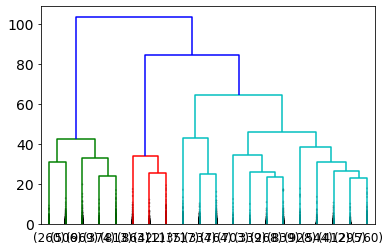

In [20]:
#import module
from scipy.cluster import hierarchy

#define figure to plot the Dendrogram
fig, ax = plt.subplots(figsize=(6, 4))

#create the Dendrogram
dend = hierarchy.dendrogram(
    hierarchy.linkage(sessions_km, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True)

Our dendrogram has a great number of lower branches, indicating there are many lower level groups of data. Consdiering the differences between the three major groups, it seems that  we may want to use 3 clusters in our Kmeans clustering algorithm.

We will now look at the results of a Kmeans clustering algorithm.

## K-means Clustering

Next we will perform K-means clustering. First, we will use a range of values of K and create an elbow plot and a silhouette plot for the dataset and determine an appropriate value for K. We will then apply a K-means clustering algorithm to the dataset using a value of K=2. We used [this website](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb) as a reference.

In [21]:
#import module
from sklearn.cluster import KMeans

#iterate through values of K and apply the Kmeans algorithm
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(sessions_km)
                for k in range(1, 10)]

#iterate through the kmeans_per_k list and calculate the inertia value for each K
inertias = [model.inertia_ for model in kmeans_per_k]

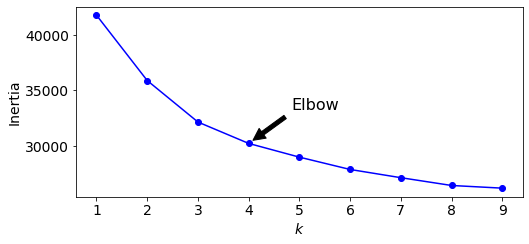

In [22]:
#plot the elbow curve to indicate which value of K we should use
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

From the above elbow plot, an appropriate value of K seems to be 4.

We will now create the silhoutte score plot.

In [23]:
#import module
from sklearn.metrics import silhouette_score

#calculate silhouette score for each value of K
silhouette_scores = [silhouette_score(sessions_km, model.labels_)
                     for model in kmeans_per_k[1:]]

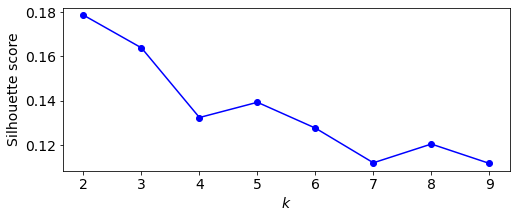

In [24]:
#graph silhouette scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

From the silhouette plot, the optimal value of K could be 2 or 3 clusters since these values would have a high silhouette score and still be low values of K. 

Next we will apply a K-means clustering algorithm to the data set using a value of K=2, per the requirements of the project, and based on the results of our silhouette plot. We will use this model to create predictions for whether or not a session ended in an online purchase - generated Revenue. 

In [25]:
#create a copy of our dataframe 
sessions_km2 = sessions_km.copy()

#use Kmeans with K=2
km = KMeans(n_clusters=2)
km.fit(sessions_km2)
#save predictions to be added to our dataframe
labels = km.predict(sessions_km2)

#label our predictions as "Revenue" in a dedicated column
sessions_km2['Revenue'] = labels

In [26]:
#check how many observations are in each cluster
sessions_km2.Revenue.value_counts()

1    9638
0    2607
Name: Revenue, dtype: int64

Since K-means applies the labels randomly to the clusters generated, we need to make sure that the cluster labeled '1' will always be the one with less observations. Based on domain knowledge we know most sessions will not end in an online purchase (these sessions should be always labeld '0'). This is important since we are comparing these clusters with the actual class of the observations and if the labels are swaped we will missinterpert the results. 

In [27]:
#create a new list to save the correct labels
Revenue_cor=[]

#verify if the mean is bigger than 0.4. Since we expect the target to be imbalanced 
#and we want the label 1 always apllied to the smaller cluster
#if the target variable has a mean larger than 0.4 it means that the label 0 was assigned to the smaller  cluster
#and the label 1 was assigned to the larger cluster
if sessions_km2.Revenue.mean()>0.4:
    for k in range (len(sessions_km2.Revenue)): #for each index in Revenue
        if sessions_km2.Revenue[k] == 0: #we swap the 0 label with the 1 label and the opposite
            Revenue_cor.append(1)
        else:
            Revenue_cor.append(0)
else: #we save the labels that were originally assigned to the clusters
    Revenue_cor = sessions_km2.Revenue

#check that the number of observations labeled  1 is the same as the size of the smaller cluster
sum(Revenue_cor)

2607

In [28]:
#input the list values back into our column Revenue
sessions_km2.Revenue = Revenue_cor
#check results
sessions_km2.Revenue.value_counts()

0    9638
1    2607
Name: Revenue, dtype: int64

Now we can be sure that the larger cluster (which is roughly 4 times the size of the smaller cluster) was labeled 0, while the smaller cluster was labeled 1.  
Based on domain knowledge we know most sessions will not end in an online purchase. The label 0 will reflect a session that ended without a purchase and the label 1 will reflect a session that ended in an online purchase.  

By clustering the sessions into 2 clusters we achieve the result we expected. Many individuals will just browse or "window shop" online, and not purchase anything. 

Next we will import the real output variable and compare our results. 

In [29]:
#read in the file
Project2_labels_file = 'https://raw.githubusercontent.com/vizelman/DAV-6150/master/Project2_Data_Labels.csv'
sessions_labels = pd.read_csv(Project2_labels_file)

In [30]:
#check the counts of the real classes
sessions_labels.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Prior to adding this information as a new column to our dataframe, we have to drop the same rows that we cancelled above (observations containing a VisitorTyoe of "Other"). 

In [31]:
#drop the same rows
sessions_labels.drop(indexname1,inplace=True)

#reset the index
sessions_labels.reset_index(drop=True, inplace = True)

In [32]:
#add the real revenue to our dataframe as a column named V_Revenue
sessions_km2['V_Revenue'] = sessions_labels

#check results
sessions_km2.head()

,VisitorType,Weekend,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_9999,Browser_1,Browser_2,Browser_4,Browser_9999,...,BounceRates,ExitRates,PageValues,SpecialDay,Month,Administrative_Duration_Avg,Informational_Duration_Avg,ProductRelated_Duration_Avg,Revenue,V_Revenue
0,1,1,1,0,0,0,1,0,0,0,...,0.000000,0.000473,0.884561,0.0,0.082709,0.000000,0.000000,0.459033,1,True
1,0,0,0,1,0,0,0,1,0,0,...,0.000193,0.000642,0.000000,0.0,0.040449,0.000000,0.000000,0.999181,0,False
2,1,0,0,1,0,0,0,1,0,0,...,0.000000,0.000352,0.000000,0.0,0.221179,0.188505,0.824395,0.485714,0,False
3,0,0,1,0,0,0,1,0,0,0,...,0.000000,0.000234,0.000000,0.0,0.214270,0.563433,0.000000,0.797892,1,False
4,0,0,0,1,0,0,0,1,0,0,...,0.000000,0.000057,0.000000,0.0,0.074417,0.893001,0.223250,0.383628,0,False


In [33]:
#Replace the True and False values with 1's and 0's to match what was done above
sessions_km2.V_Revenue = sessions_km2.V_Revenue.replace(to_replace = [True,False],value = [1,0])

#check results
sessions_km2.head()

,VisitorType,Weekend,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_9999,Browser_1,Browser_2,Browser_4,Browser_9999,...,BounceRates,ExitRates,PageValues,SpecialDay,Month,Administrative_Duration_Avg,Informational_Duration_Avg,ProductRelated_Duration_Avg,Revenue,V_Revenue
0,1,1,1,0,0,0,1,0,0,0,...,0.000000,0.000473,0.884561,0.0,0.082709,0.000000,0.000000,0.459033,1,1
1,0,0,0,1,0,0,0,1,0,0,...,0.000193,0.000642,0.000000,0.0,0.040449,0.000000,0.000000,0.999181,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0.000000,0.000352,0.000000,0.0,0.221179,0.188505,0.824395,0.485714,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0.000000,0.000234,0.000000,0.0,0.214270,0.563433,0.000000,0.797892,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0.000000,0.000057,0.000000,0.0,0.074417,0.893001,0.223250,0.383628,0,0


In [34]:
#compare mean and standard deviation of our target and real class variables
print('This is the mean of our target variable Revenue:',round(sessions_km2.Revenue.mean(),4))
print('This is the mean of the real class variable V_Revenue:',round(sessions_km2.V_Revenue.mean(),4))
print('This is the std of our target variable Revenue:',round(sessions_km2.Revenue.std(),4))
print('This is the std of the real class variable V_Revenue:',round(sessions_km2.V_Revenue.std(),4))

This is the mean of our target variable Revenue: 0.2129
This is the mean of the real class variable V_Revenue: 0.1545
This is the std of our target variable Revenue: 0.4094
This is the std of the real class variable V_Revenue: 0.3615


As we can see the means of the two Target variables are slightly different. This was anticipated since we did not expect the clustering model to generate totally accurate clusters of sessions.

Since the mean is closer to 0 in both cases, we conclude that most sessions do not result in revenue. This is in line with our expectations as explained above, that many individuals browse the internet just to browse with no intention of purchasing anything.

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#apply accuracy function to the dataset 
accuracy1 = accuracy_score(sessions_km2.V_Revenue, sessions_km2.Revenue)
print("Actual vs. Clusters Accuracy is: %s" %round(accuracy1,4))

#apply recall function to the dataset
sensitivity1 = recall_score(sessions_km2.V_Revenue, sessions_km2.Revenue)
print("Actual vs. Clusters Recall is: %s" %round(sensitivity1,4))

#get the AUC
fprtest, tprtest, thresholds = metrics.roc_curve(sessions_km2.V_Revenue, sessions_km2.Revenue, pos_label=1) #apply roc_curve() to get fpr, tpr
auc1 = metrics.auc(fprtest, tprtest) #print the AUC
print("Actual vs. Clusters AUC is: %s" %round(auc1,4))

#apply F1 function to the dataset
F1_score1 = f1_score(sessions_km2.V_Revenue, sessions_km2.Revenue)
print("Actual vs. Clusters F1 Score is: %s" %round(F1_score1,4))

#apply Precision function to the dataset
Precision_score1 = precision_score(sessions_km2.V_Revenue, sessions_km2.Revenue)
print("Actual vs. Clusters Precision Score is: %s" %round(Precision_score1,4))

Actual vs. Clusters Accuracy is: 0.696
Actual vs. Clusters Recall is: 0.2051
Actual vs. Clusters AUC is: 0.4954
Actual vs. Clusters F1 Score is: 0.1725
Actual vs. Clusters Precision Score is: 0.1488


The metrics above tell us that even though the proportion of classes is very  similar in magnitude, the actual class coresponds  with the class generated by the clustering only for 70% of the observations. 

Our goal of implementing K-means clustering was to generate clusters that would be realistic in magnitude (not of equal size). The methods of feature engeneering we implemented to cluster the observations using K-means were according to best practices. The poor results could be due to forcing a K value of 2 on the K-means algorithm, even tho 3 or 4 could have been a better value for K.

## Model Evaluation Metrics

We see that the percentage of sessions in our training set which resulted in a purchase is 21.29%. This means that we could achieve a model accuracy of (1-.2129) = 0.7871 or 78.71% by simply predicting 0 or "did not result in a purchase" for each session. 

If we classify a session that did not actually end in revenue as ending in revenue, we would be overestimating our revenue. If we classify a session that did end in revenue as not ending in revenue, we would underestimate our revenue. For this project, overestimating revenue would be worse, since you might make other financial decisions based on this overestimation and then end up being overexposed. Meaning, we should be minimizing the false-positive predictions we generate, and preferring a model with a higher Precision score. 

However, it is still important not to excessively underestimate the revenue. Therefore, we will evaluate our models by looking at the F1 score. The F1 score is the harmonic mean between precision and recall and will therefore be the most useful metric to strike a balance between the costs. Additionally, the F1 score is the best metric to use when the target is imbalanced, which is the case in this dataset.

Based on the above, we will be most interested in the Precision and F1 scores when comparing models. We will also look at the AUC, Recall, and Accuracy, since we are attempting to achieve the best trade-off between all of these metrics.

We noted above that the target variable is imbalanced, meaning that roughly 80% of sessions in our dataset did not result in a purchase. Since we will be creating SVM classification models we would also like to be able to compare them with a Logistic Regression classification model with the same predictor variables, we decided not to use oversampling to balance the target variable.
[This article](https://win-vector.com/2015/02/27/does-balancing-classes-improve-classifier-performance/) explains that adjusting for an imbalanced class does not materially impact the performance of a logistic regression model.
Additionally, [this article](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) states "reworking the problem itself is often the best way to tackle an imbalanced classes problem: the classifier and the decision rule have to be set with respect to a well chosen goal that can be, for example, minimizing a cost."

Now that we have checked our null error rate, and have decided upon the metrics of interest, we will create our SVM models.

## SVM models

First we are going to do additional EDA since we now have our target variable, to see if any of the variables have a strong relationship with our target variable.
Second, we will divide the data into training and testing datasets.
Then we will use the Revenue variable, that was generated from our K-means clustering algorithm predictions, to train our models. 
We will choose the better of our two models, and then test it using our test dataset and then compare the results to the actual class (V_Revenue). 

## EDA

Now we will perform some additional EDA since we have the target variable, to see what variables may be good predictors for our SVM models. Additionally, since we normalized the numerical attributes (and month), their distributions will have changed, so we will look at these new distributions here. 

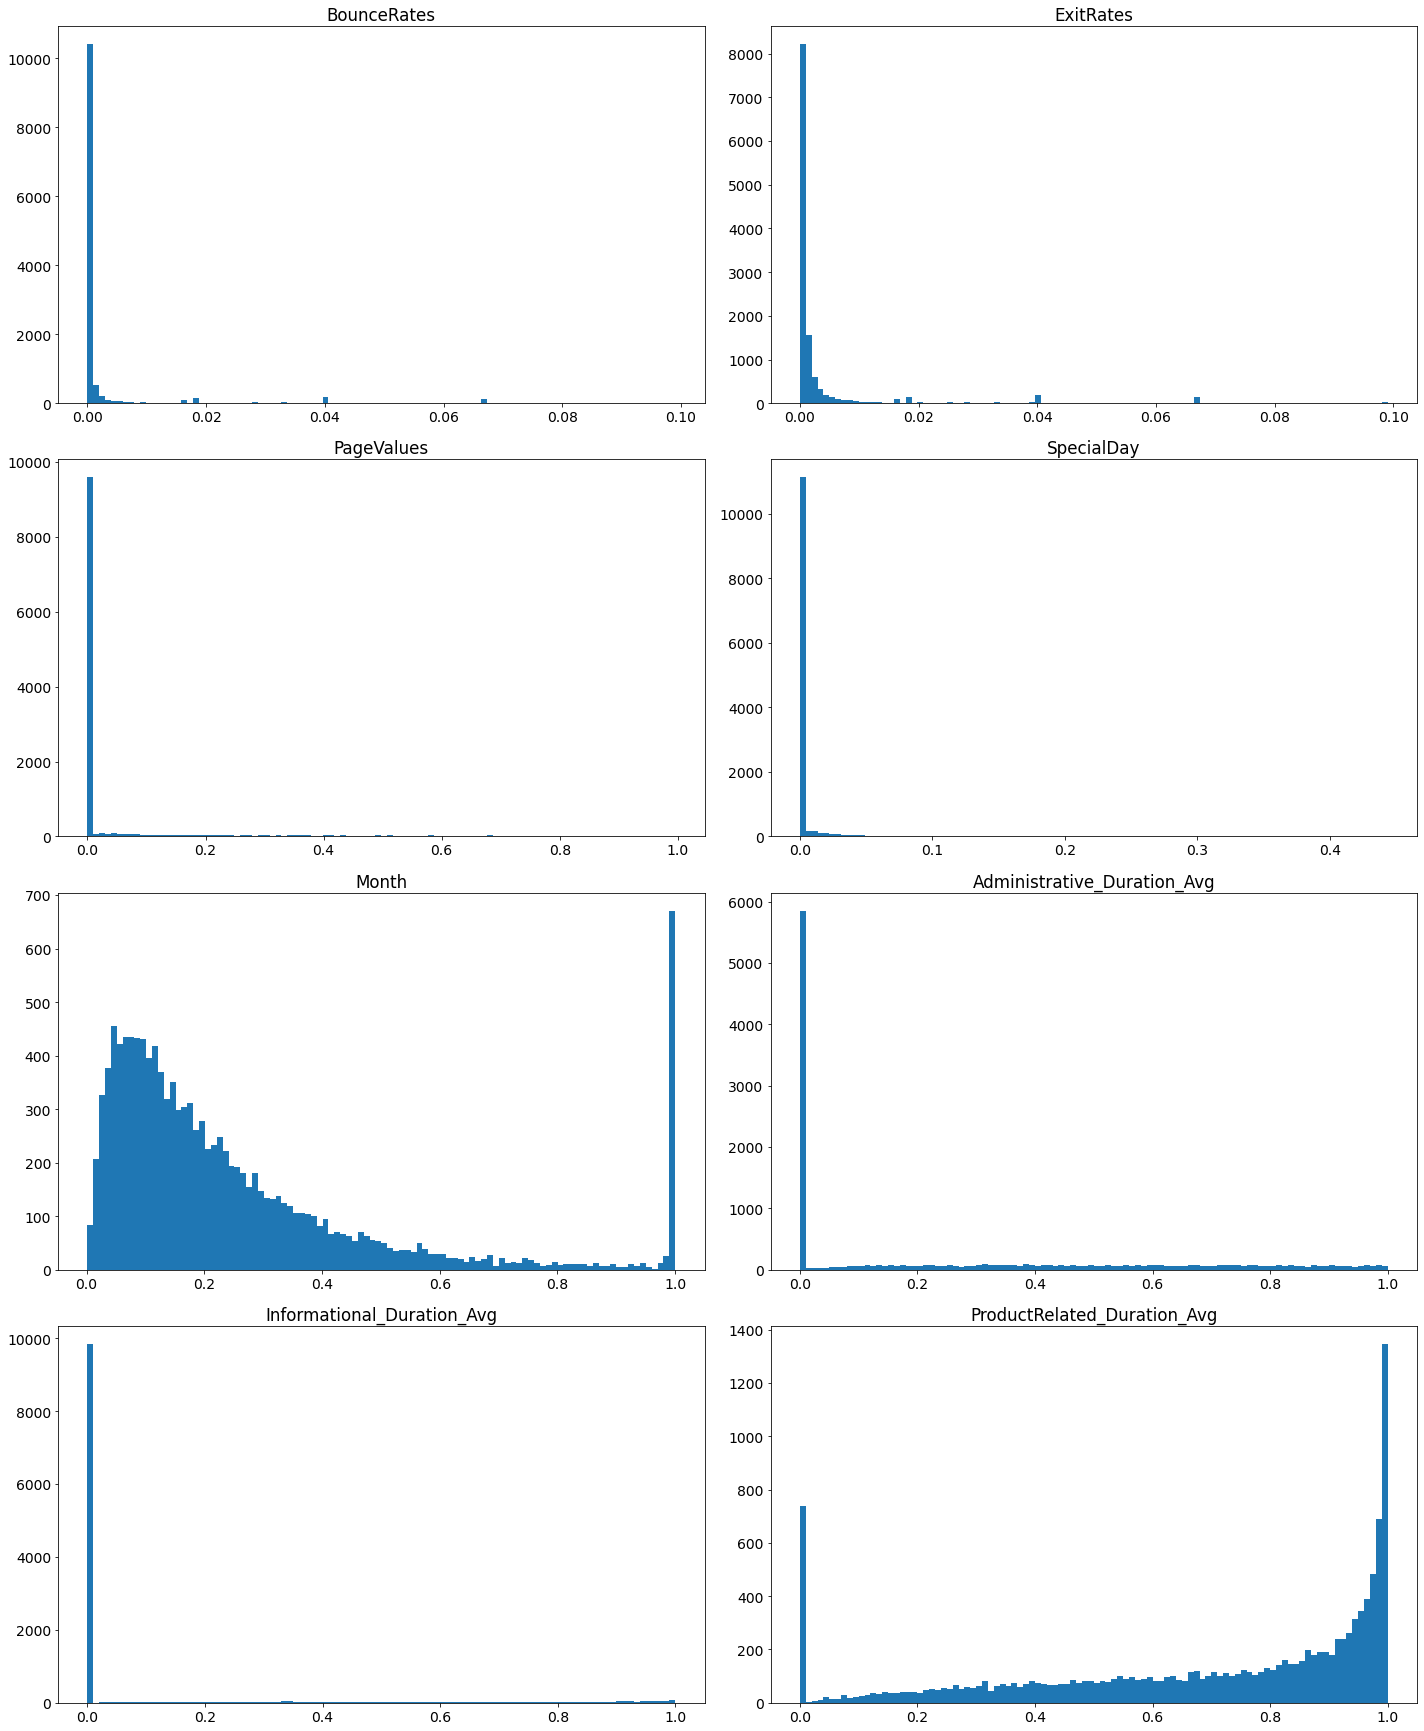

In [36]:
#plot a histogram for each of our numerical attributes

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
for k in sessions_normalize_avg : #for each numerical column 
    plt.subplot(5,2,j) 
    plt.hist(sessions_km2[k],bins=100)
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

We see from above that the ProductRelated_Duration_Avg has a mode of 1 and is left skewed with another peak at 0. 
Both Informational_Duration_Avg and Administrative_Duration_Avg are right skewed with a mode of 0. 
The rest of the variables are right skewed. 

Now we will look at these numerical variables (and month) plotted against our target variable to see if there are any relationships.

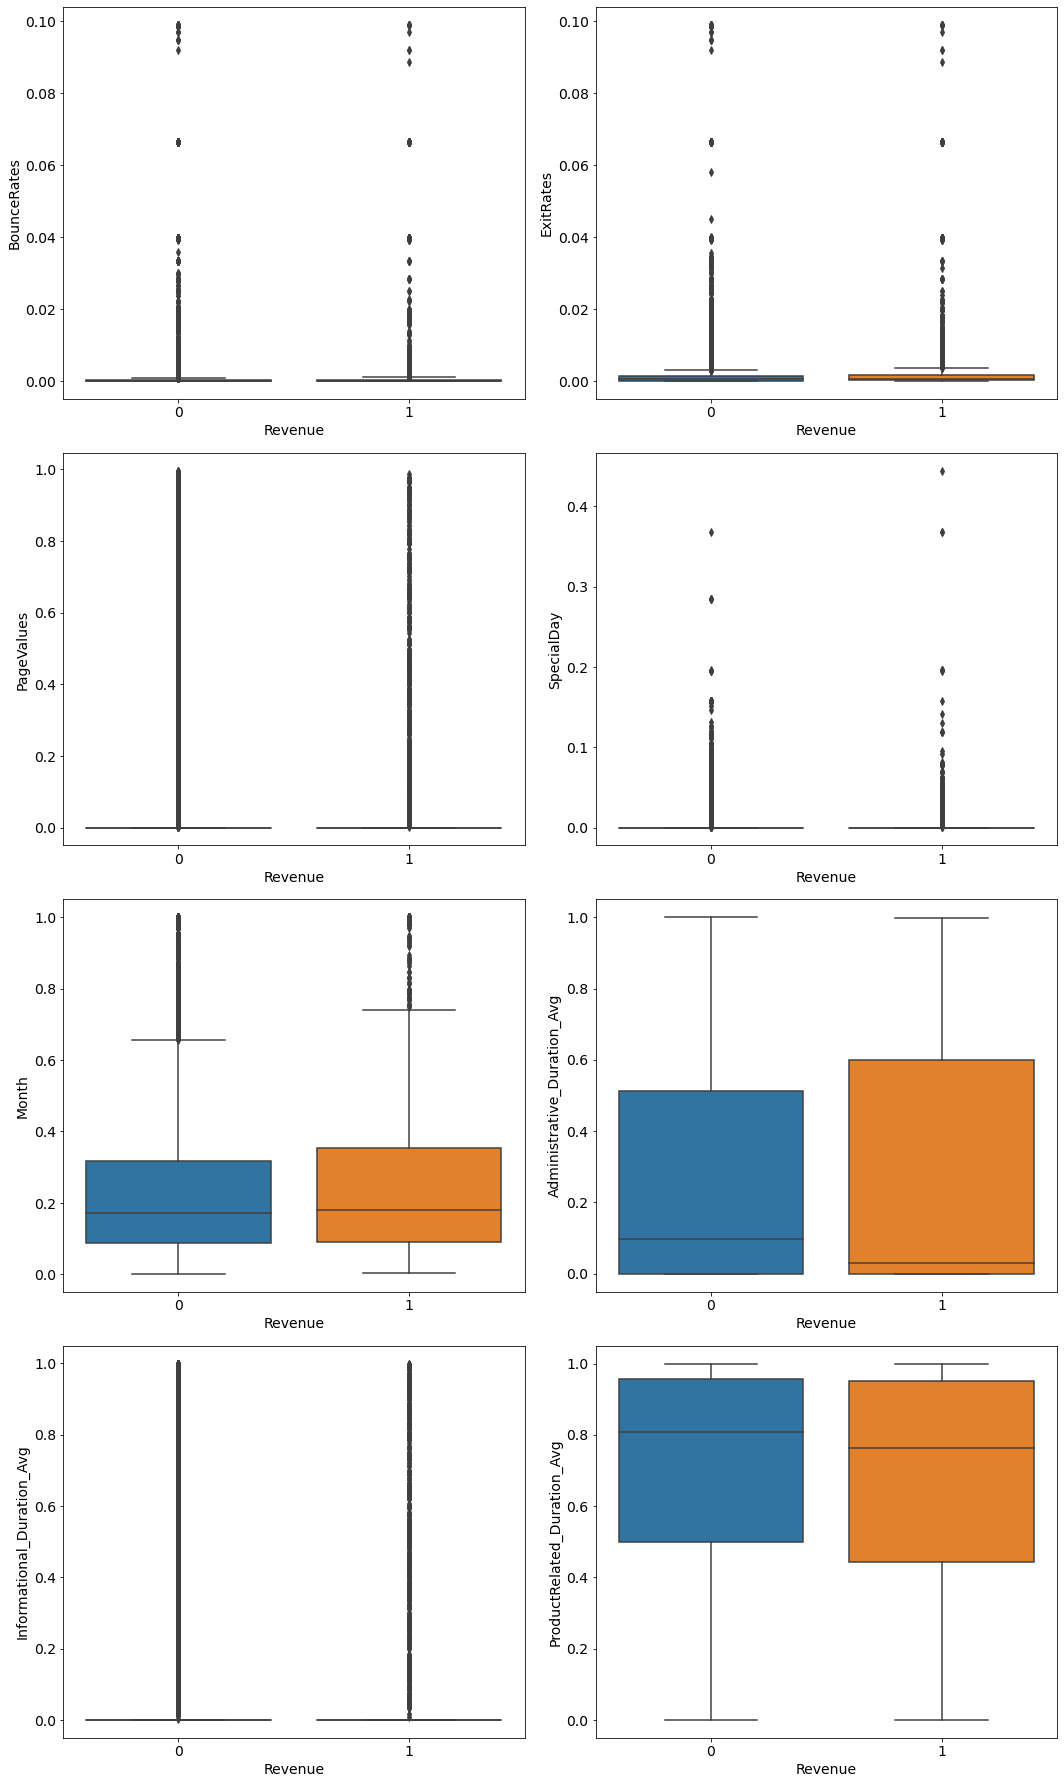

In [37]:
#plot boxplots of the distribution of each numerical variable (and month) against the target variable (Revenue)

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,25)}) 

#use an index to identify the spot of the subplot
j=1
for k in sessions_normalize_avg.columns.tolist():   #for each numerical variable and month
    plt.subplot(4,2,j) 
    sns.boxplot(data=sessions_km2, x='Revenue', y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

From the boxplots, it seems that ProductRelated_Duration_Avg and Administrative_Duration_Avg may be useful in our models, since it seems that a lower average duration for these two types of pages in a session means that the session was less likely to result in revenue. 
Now we will produce the correlation matrix.

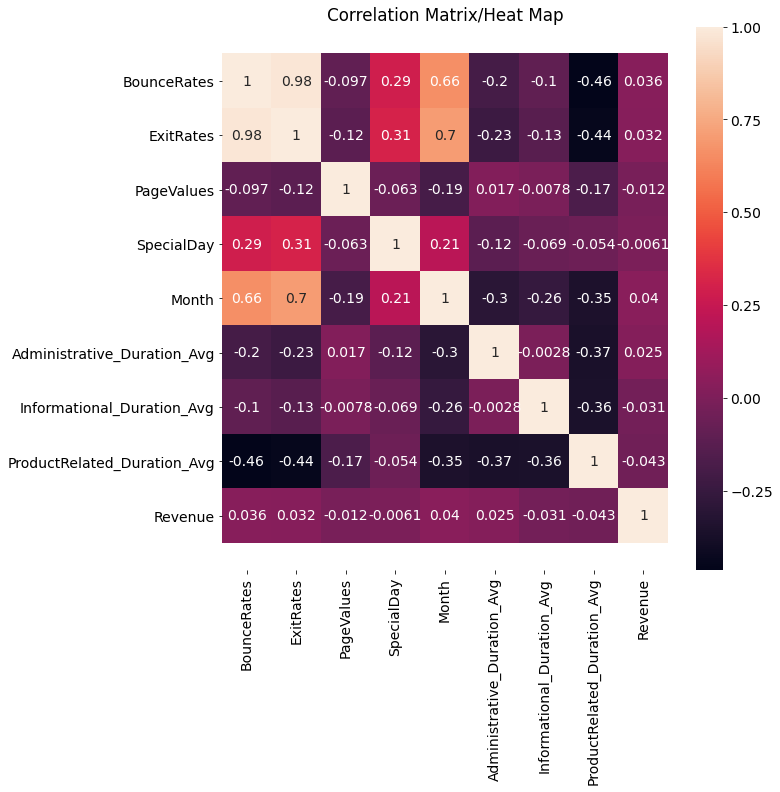

In [38]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(10, 10)) 

#create a df with numeric + target variables
corr_dataset = sessions_normalize_avg.copy()
corr_dataset['Revenue'] = sessions_km2.Revenue

#get correlation matrix
corrMatrix = corr_dataset.corr() 
#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

The attributes BounceRates and ExitRates have a very strong positive correlation, indicating we should probably only use one of these variables in our model, not both (in the event that we choose to use a linear SVM kernel). BounceRates and ExitRates also have a moderately strong correlation with Month. 

None of these variables have a strong correlation with our target variable. The variable with the strongest correlation is ProductRelated_Duration_Avg, which we expected after seeing the boxplots of the two variables. 

Next, we will look at the relationships between our categorical variables and the target variable.

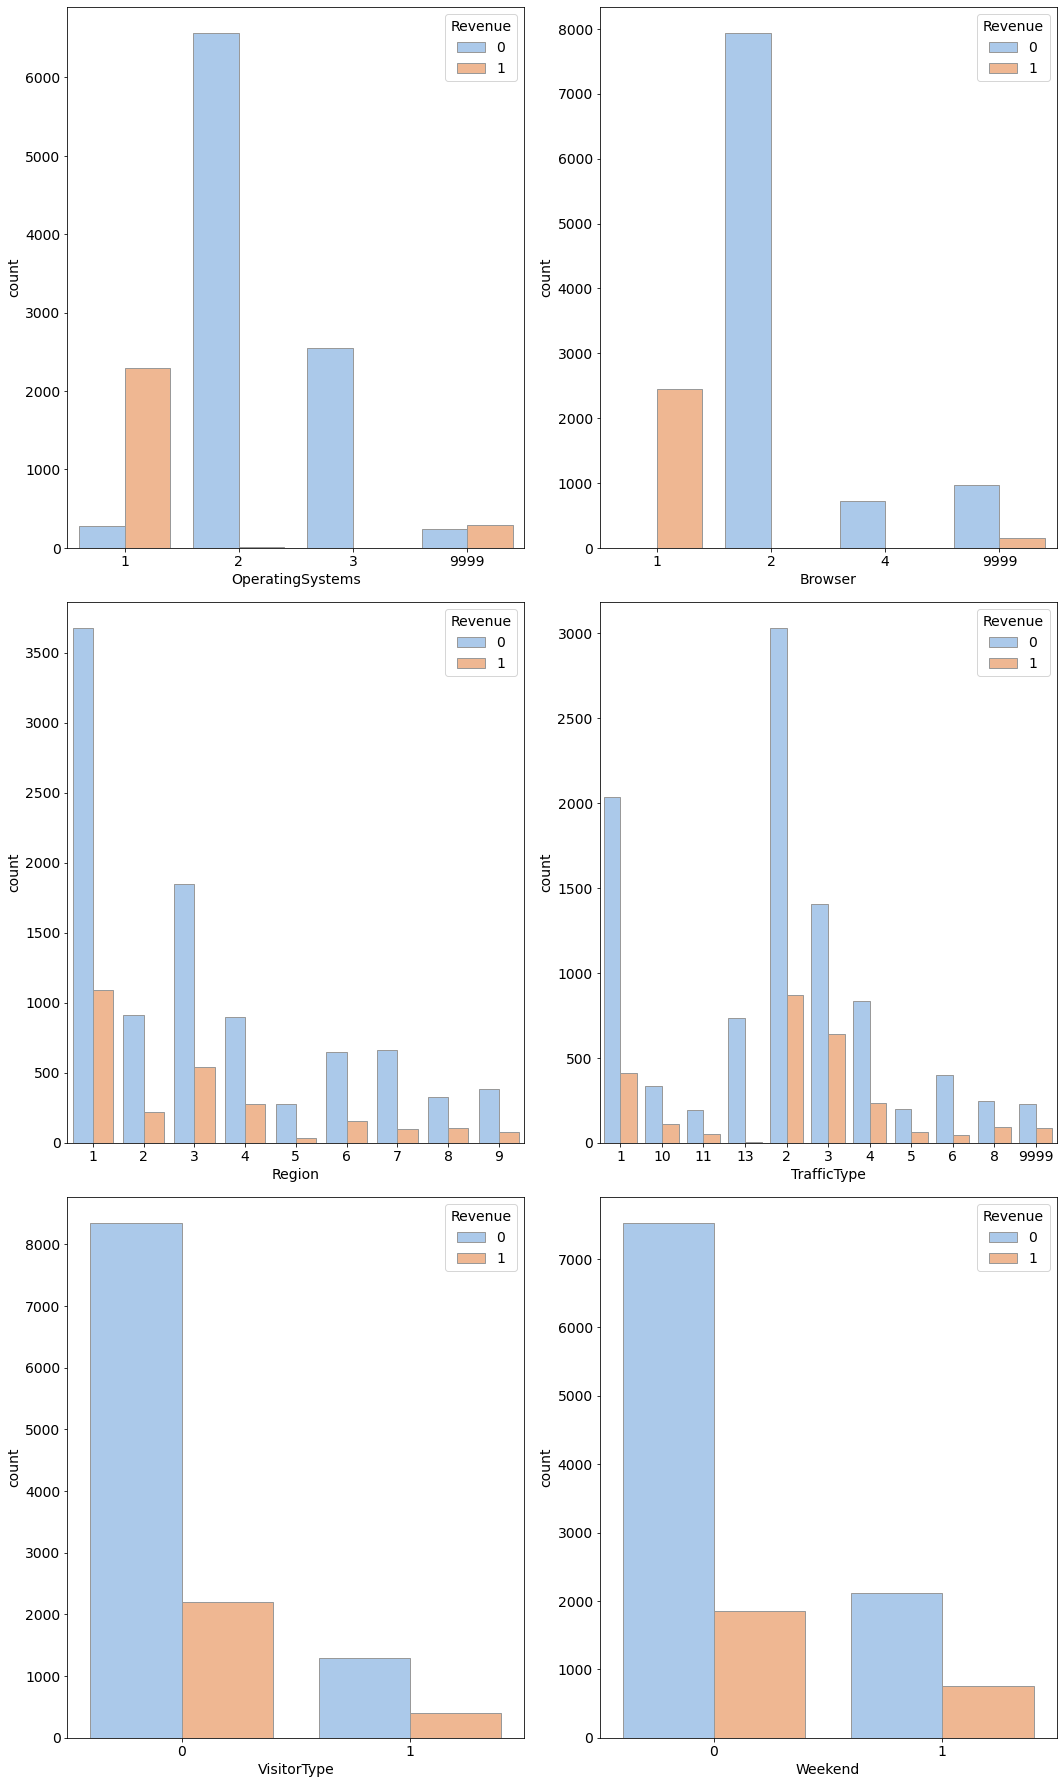

In [39]:
#create a list of our categorical attributes
barplot_df=pd.concat([sessions_new[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']],
                     sessions_km2['Revenue']],axis=1)

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,25)}) 

j=1
for k in barplot_df.columns.to_list()[0:6]:   #for each variable 
    plt.subplot(3,2,j) 
    sns.countplot(x=k, hue="Revenue",  palette="pastel", edgecolor=".6",data=barplot_df)
    j=j+1

plt.tight_layout()
#show results
plt.show()

Looking at the side by side count barplots it seems that all the variables could be good predictors for our target variable. From these plots it appears that Browser and OperatingSystems might be the best predictors. For example, it seems that sessions conducted in Browsers 2 and 4 almost exclusively resulted in a purchase. Similarly, sessions with Operating Systems 2 and 3 also almost exclusively resulted in a purchase. 

We will now perform the Chi-Square test to evaluate if any dependency is present between our categorical variables and the target variable.

In [40]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
chi_sq=[]
var_name = barplot_df.columns.to_list()[0:6]
#sessions_new.columns.tolist()
for i in range(len(var_name)):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(barplot_df.Revenue, barplot_df.iloc[:,:-1].iloc[:,i]))[0:2],var_name[i]])
#sort results
chi_sq.sort(reverse=True)

#put results in a dataframe
chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(11450.767005208147, 0.0)",Browser
1,"(9873.53593477579, 0.0)",OperatingSystems
2,"(400.5900520016704, 7.049545534297839e-80)",TrafficType
3,"(74.46700419468719, 6.30641243171965e-13)",Region
4,"(54.4054359348091, 1.6311103911189094e-13)",Weekend
5,"(8.591466033499803, 0.0033774199631166862)",VisitorType


The results of our Chi-Square test indicate that all of the variables have a p value of less than .05 associated with their chi square value. This indicates that all of the variables could be useful in our model. 

Next we will look to see if operating system and browser are independent.  Based on our domain knowledge we think there may be a relationship between the two variables. Individuals who use Apple products are more likely to use Safari since that is the default browser on Apple products, while Windows users may be more prone to use Google Chrome or Internet Explorer. 

In [41]:
#chi_sq independence test between Browser and OperatingSystems
stats.chi2_contingency(pd.crosstab(barplot_df.Browser, barplot_df.OperatingSystems))[0:2]

(9709.273920008935, 0.0)

We see that Browser and OperatingSystem are not independent and therefore we will use only one of them in our model.

## Models

The first model that we want to create is with the following variables: ProductRelated_Duration_Avg, Administrative_Duration_Avg, Browser, TrafficType, Region and Weekend. 

For the second model we will swap the variable Browser with the variable OperatingSystem to evaluate which model performs better.

We will also fit Logisitic Regression models using the same sets of variables as a baseline to which we will compare our SVM model performance. 

Now we are going to create our train and test sets.

In [42]:
#load train_test_split and metrics from scikit learn
from sklearn.model_selection import train_test_split 
from sklearn import metrics

models_df = sessions_km2.copy()

x = models_df.drop(columns = 'Revenue')

y = models_df.Revenue

#create training and testing variables, use 80% of the data to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Now we will drop the variable V_Revenue from the training set because we can not use it to train our data. We will leave it within the test dataset so that we can use this for comparison later on.

In [43]:
#drop the column
x_train=x_train.drop(columns = 'V_Revenue').copy()

#double check that the variable is no longer present
x_train.head()

,VisitorType,Weekend,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_9999,Browser_1,Browser_2,Browser_4,Browser_9999,...,TrafficType_8,TrafficType_9999,BounceRates,ExitRates,PageValues,SpecialDay,Month,Administrative_Duration_Avg,Informational_Duration_Avg,ProductRelated_Duration_Avg
2573,0,0,0,1,0,0,0,1,0,0,...,0,0,0.000083,0.000410,0.000000,0.0,0.394525,0.797268,0.0,0.456852
9880,0,0,1,0,0,0,1,0,0,0,...,0,0,0.000000,0.002451,0.000000,0.0,0.588170,0.000000,0.0,0.808734
2131,1,0,0,1,0,0,0,0,0,1,...,0,1,0.000000,0.000266,0.816699,0.0,0.255618,0.319523,0.0,0.406899
7154,0,0,0,0,1,0,0,1,0,0,...,0,0,0.000082,0.000082,0.000000,0.0,0.044025,0.960251,0.0,0.275644
11200,0,0,0,1,0,0,0,1,0,0,...,0,0,0.000000,0.000721,0.000000,0.0,0.603772,0.000000,0.0,0.797157


Since we will compare the results of our predictions on the test set with the actual class ("V_Revenue"), we will now create another y_test which we will call y_test_actual, that contains the values that are currently in x_test for the column "V_Revenue".

In [44]:
#create a new y_test containing the actual V_Revenue values
y_test_actual=x_test.V_Revenue

#now drop the V_Revenue column from x_test since we cannot use this data to test
x_test=x_test.drop(columns='V_Revenue').copy()

#check results
y_test_actual

12013    0
12185    1
6061     0
11086    0
10781    0
        ..
1135     1
7739     0
8415     0
4091     0
7843     0
Name: V_Revenue, Length: 2449, dtype: int64

## Model 1 

First we will select the columns that we identified above from our training dataset and select k-1 dummies from our categorical variables. Then we will create a logistic regression using these variables to establish a baseline for comparison. Next, we  will fit the SVM model and check our results. 

We will use cross validation using 5 folds to obtain performance scores for our SVM model. Since our sample size is sufficiently large, five folds is appropriate. 

In [45]:
#drop the columns with Operating Systems, and other columns not of interest
#also drop 1 dummy variable for each of our other categorical variables
x1_train = x_train.drop(columns=['OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_9999','Browser_1', 'Region_1', 'TrafficType_1',
                                'ExitRates', 'Month', 'PageValues', 'BounceRates', 'SpecialDay', 'Informational_Duration_Avg'])

#check results
x1_train

,VisitorType,Weekend,Browser_2,Browser_4,Browser_9999,Region_2,Region_3,Region_4,Region_5,Region_6,...,TrafficType_13,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_9999,Administrative_Duration_Avg,ProductRelated_Duration_Avg
2573,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0.797268,0.456852
9880,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000000,0.808734
2131,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.319523,0.406899
7154,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.960251,0.275644
11200,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0.000000,0.797157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.708174,0.554795
3264,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000000,0.989461
9845,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.985850
10799,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.307551,0.947048


In [46]:
#import stats model
import statsmodels.api as sm

#create our x to be used in the model based on the variables selected earlier
x1_train_log = x1_train.copy()

#add constant
x1_train_log = sm.add_constant(x1_train_log)

#define the model type as logistic regression
results = sm.Logit(y_train,x1_train_log).fit()

#print summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.030085
         Iterations 24
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                 9796
Model:                          Logit   Df Residuals:                     9770
Method:                           MLE   Df Model:                           25
Date:                Mon, 20 Jul 2020   Pseudo R-squ.:                  0.9417
Time:                        00:35:10   Log-Likelihood:                -294.72
converged:                       True   LL-Null:                       -5053.0
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           8.6794      1.139      7.618      0.000  

We note that we receive an error about quasi-separation. We did some research and we found this [article](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/) which explains why this happens for logistic regression.

Since we will ultimately be using an SVM model, for which this problem is less of an issue, we are not overly concerned with this error. That being said, we will not calculate performance statistics for this logistic regression model as there are likely to be issues with the predictions generated. Similarly, since we have identified this issue, we will not rely on the p-values generated by this model to determine the significance of our coefficients.

We will now proceed to build our SVM model with a linear kernel using these variables. Per our textbook ("HOML"), using a linear kernel should be the first step when performing SVM, especially if we are using many features (which we are).

In [47]:
#Import the packages needed
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#save and fit the first model
svm_lin_1 = SVC(kernel='linear')
svm_lin_1.fit(x1_train, y_train)


#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_recall_svm_lin1 = cross_val_score(svm_lin_1, x1_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_lin1 = cross_val_score(svm_lin_1, x1_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_lin1 = cross_val_score(svm_lin_1, x1_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_lin1 = cross_val_score(svm_lin_1, x1_train, y_train, cv=5,scoring='f1')
cross_val_results_precision_svm_lin1 = cross_val_score(svm_lin_1, x1_train, y_train, cv=5,scoring='precision')

#print results
print("Cross validated metrics for the SVM Model 1 with linear kernel")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_lin1),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_lin1),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_lin1),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_lin1),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cross_val_results_precision_svm_lin1),4))

Cross validated metrics for the SVM Model 1 with linear kernel
The average Accuracy score for the 5 folds was:  0.9886
The average Recall score for the 5 folds was:  0.9556
The average AUC score for the 5 folds was:  0.9957
The average F1 score for the 5 folds was:  0.9724
The average Precision score for the 5 folds was:  0.9901


Using this model, we achieve very high scores for each of the above metrics. This tells us that the data is most likely linearly separable, and a linear kernel is appropriate.

## Model 2

Next, we will create another SVM model using the same variables but swapping out the Browser variables with the Operating System variables. We will also create a logistic regression model with these same variables first to check the statistical significance of the p-values of the coefficients.

We will use cross validation using 5 folds to obtain performance scores for our model. Since our sample size is sufficiently large, five folds is appropriate. 

In [48]:
#drop the columns with Browser, and other columns not of interest
#also drop 1 dummy variable for each of our other categorical variables
x2_train = x_train.drop(columns=['Browser_1','Browser_2', 'Browser_4', 'Browser_9999', 'OperatingSystems_1', 'Region_1', 'TrafficType_1',
                                'ExitRates', 'Month', 'PageValues', 'BounceRates', 'SpecialDay', 'Informational_Duration_Avg'])

#check results
x2_train

,VisitorType,Weekend,OperatingSystems_2,OperatingSystems_3,OperatingSystems_9999,Region_2,Region_3,Region_4,Region_5,Region_6,...,TrafficType_13,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_9999,Administrative_Duration_Avg,ProductRelated_Duration_Avg
2573,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0.797268,0.456852
9880,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000000,0.808734
2131,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.319523,0.406899
7154,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.960251,0.275644
11200,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0.000000,0.797157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.708174,0.554795
3264,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000000,0.989461
9845,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.985850
10799,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.307551,0.947048


In [49]:
#create our x to be used in the model based on the variables selected earlier
x2_train_log = x2_train.copy()

#add constant
x2_train_log = sm.add_constant(x2_train_log)

#define the model type as logistic regression
results2 = sm.Logit(y_train,x2_train_log).fit()

#print summary
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.107346
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                 9796
Model:                          Logit   Df Residuals:                     9770
Method:                           MLE   Df Model:                           25
Date:                Mon, 20 Jul 2020   Pseudo R-squ.:                  0.7919
Time:                        00:35:14   Log-Likelihood:                -1051.6
converged:                       True   LL-Null:                       -5053.0
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.1805      0.234      9.322      0.000  

We see that the coefficients associated with our OperatingSystems variables all have p-values of near 0, indicating these are important columns to include. 

There a few TrafficType dummy variables which have a statistically significant coefficient, however, we do not believe that it would be appropriate to only use some of the dummy variables in our SVM model. 

We will use a linear kernel for our SVM model for the same reasons stated above.

In [50]:
#save and fit the second model
svm_lin_2 = SVC(kernel='linear')
svm_lin_2.fit(x2_train, y_train)

#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_recall_svm_lin2 = cross_val_score(svm_lin_2, x2_train, y_train, cv=5,scoring='recall')
cross_val_results_accuracy_svm_lin2 = cross_val_score(svm_lin_2, x2_train, y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc_svm_lin2 = cross_val_score(svm_lin_2, x2_train, y_train, cv=5,scoring='roc_auc')
cross_val_results_f1_svm_lin2 = cross_val_score(svm_lin_2, x2_train, y_train, cv=5,scoring='f1')
cross_val_results_precision_svm_lin2 = cross_val_score(svm_lin_2, x2_train, y_train, cv=5,scoring='precision')

#print results
print("Cross validated metrics for the SVM Model 2 with linear kernel")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cross_val_results_accuracy_svm_lin2),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cross_val_results_recall_svm_lin2),4))
print("The average AUC score for the 5 folds was: ", round(np.mean(cross_val_results_rocauc_svm_lin2),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cross_val_results_f1_svm_lin2),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cross_val_results_precision_svm_lin2),4))

Cross validated metrics for the SVM Model 2 with linear kernel
The average Accuracy score for the 5 folds was:  0.9572
The average Recall score for the 5 folds was:  0.9918
The average AUC score for the 5 folds was:  0.9774
The average F1 score for the 5 folds was:  0.9075
The average Precision score for the 5 folds was:  0.8366


The results of our second SVM model are quite similar to those of our first model. Also, all of the metrics have very high scores. 

## Model Comparison

Now we will compare the results of our two models and decide which is the best model to use.

In [51]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_svm_lin1),4),
                                     round(np.mean(cross_val_results_recall_svm_lin1),4),
                                     round(np.mean(cross_val_results_rocauc_svm_lin1),4),
                                     round(np.mean(cross_val_results_f1_svm_lin1),4),
                                     round(np.mean(cross_val_results_precision_svm_lin1),4)],
                                    [round(np.mean(cross_val_results_accuracy_svm_lin2),4),
                                     round(np.mean(cross_val_results_recall_svm_lin2),4),
                                     round(np.mean(cross_val_results_rocauc_svm_lin2),4),
                                     round(np.mean(cross_val_results_f1_svm_lin2),4),
                                     round(np.mean(cross_val_results_precision_svm_lin2),4)]]),
                   columns=['Accuracy', 'Recall','AUC', 'F1', 'Precision'],index=['SVM1','SVM2'])

#print results
summary_df

,Accuracy,Recall,AUC,F1,Precision
SVM1,0.9886,0.9556,0.9957,0.9724,0.9901
SVM2,0.9572,0.9918,0.9774,0.9075,0.8366


Our results show that the first SVM model, using Browser information, had a higher score for each metric excluding Recall, which had a slightly lower score. 

Based on these results, and since F1 and Precision were the two metrics we identified to be most of interest, we will choose model 1 to apply to the test data. 

## Testing

Now we will apply the test data to our first SVM model and compare these results to V_Revenue.

In [52]:
#get a list of the columns in x1 train
test_columns = x1_train.columns.tolist()

#use only columns included in training set
x1_test = x_test[test_columns]

#use our model to predict values from the test set
predictions2 = svm_lin_1.predict(x1_test)

#check results
predictions2

array([0, 1, 0, ..., 0, 0, 0])

In [53]:
#apply accuracy function to the dataset 
test_accuracy = accuracy_score(y_test, predictions2)
print("Test Accuracy is:%s" %round(test_accuracy,4))

#apply recall function to the dataset
test_sensitivity = recall_score(y_test, predictions2)
print("Test Recall is:%s" %round(test_sensitivity,4))

#get the AUC
fprtest, tprtest, thresholds = metrics.roc_curve(y_test, predictions2, pos_label=1) #apply roc_curve() to get fpr, tpr
test_auc = metrics.auc(fprtest, tprtest) #print the AUC
print("Test AUC is:", round(test_auc,4))

#apply F1 function to the dataset
test_F1_score = f1_score(y_test, predictions2)
print("Test F1 Score is:%s" %round(test_F1_score,4))

#apply Precision function to the dataset
test_Precision_score = precision_score(y_test, predictions2)
print("Test Precision Score is:%s" %round(test_Precision_score,4))

Test Accuracy is:0.9873
Test Recall is:0.9515
Test AUC is: 0.9744
Test F1 Score is:0.9705
Test Precision Score is:0.9903


In [54]:
#summary of comparison between SVM1 and test data
summary_df2 = pd.DataFrame(np.array([[round(np.mean(cross_val_results_accuracy_svm_lin1),4),
                                     round(np.mean(cross_val_results_recall_svm_lin1),4),
                                     round(np.mean(cross_val_results_rocauc_svm_lin1),4),
                                     round(np.mean(cross_val_results_f1_svm_lin1),4),
                                     round(np.mean(cross_val_results_precision_svm_lin1),4)],
                                    [round(np.mean(test_accuracy),4),
                                     round(np.mean(test_sensitivity),4),
                                     round(np.mean(test_auc),4),
                                     round(np.mean(test_F1_score),4),
                                     round(np.mean(test_Precision_score),4)]]),
                   columns=['Accuracy', 'Recall','AUC', 'F1', 'Precision'],index=['SVM1', 'Test'])

#print results
summary_df2

,Accuracy,Recall,AUC,F1,Precision
SVM1,0.9886,0.9556,0.9957,0.9724,0.9901
Test,0.9873,0.9515,0.9744,0.9705,0.9903


It is promising that our test data yielded a higher Precision score, and an F1 score that was only very slightly lower, since these were the two metrics most of interest given the purpose of our model.  The AUC, Recall, and Accuracy are only slightly lower for the model applied to the test data.

## Test Results Comparison to Actual Target (V_Revenue)

Now we will compare the results of our model on the test data to the actual target variable of V_Revenue.

In [55]:
#apply accuracy function to the dataset 
test_accuracy2 = accuracy_score(y_test_actual, predictions2)
print("Actual Accuracy is:%s" %round(test_accuracy2,4))

#apply recall function to the dataset
test_sensitivity2 = recall_score(y_test_actual, predictions2)
print("Actual Recall is:%s" %round(test_sensitivity2,4))

#get the AUC
fprtest, tprtest, thresholds = metrics.roc_curve(y_test_actual, predictions2, pos_label=1) #apply roc_curve() to get fpr, tpr
test_auc2 = metrics.auc(fprtest, tprtest) #print the AUC
print("Actual AUC is:", round(test_auc2,4))

#apply F1 function to the dataset
test_F1_score2 = f1_score(y_test_actual, predictions2)
print("Actual F1 Score is:%s" %round(test_F1_score2,4))

#apply Precision function to the dataset
test_Precision_score2 = precision_score(y_test_actual, predictions2)
print("Actual Precision Score is:%s" %round(test_Precision_score2,4))

Actual Accuracy is:0.6982
Actual Recall is:0.2068
Actual AUC is: 0.4979
Actual F1 Score is:0.1761
Actual Precision Score is:0.1534


## Conclusions

Our results show that the K-means clustering model was generating two clusters with similar magnitudes of classes to the magnitudes we were expecting (one larger class that would represent sessions which did not end in a purchase, and a much smaller class that represents sessions which did end in a purchase). 

The SVM model trained on the classes generated from the clustering model performed very well on the test subset. 

However, when comparing the predicting Revenue classes to the actual V_Revenue classes, the results are abysmal. We see that we have very low Precision and F1 scores which is particularly bad as we were trying to minimize false positives. 

We note that the Accuracy is lower than the null error rate. 

These results are not very surprising, as we have seen earlier the clustering model did not classify the Revenue class properly, even though the magnitude of the two classes it generated seemed appropriate to our hypothesis on the real classes based on domain knowledge. 

The next step twoards improving the predictions of the actual classes would be investigating clustering methods which are more sophisticated. 